# 1 Визуальный анализ данных #

***Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)***

***Сохраните результат. Загрузите на сайт и отчитайтесь по заданию***

In [162]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

В данном датасете целевым является признак count - количество арендованных велосипедов

In [163]:
##загрузите с помощью pandas файл train.csv из предложенного датасета
df = pd.read_csv('train.csv')
## выведите первые пять строчек
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [164]:
# выведите информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Первый столбец в датасете datatime содержит дату и время. В таблице будет несколько строк соответствующих одному и тому же дню, но с разным временем.

Нужно сделать таким образом, чтобы для каждого дня была одна строка, время можно удалить. Продумайте что нужно сделать с остальными полями:
- season        
- holiday       
- workingday    
- weather       
- temp          
- atemp         
- humidity      
- windspeed     
- casual        
- registered    
- count         

In [165]:
## код
df['datetime'] = pd.to_datetime(df['datetime']).dt.date
df = df.groupby('datetime').agg(
                                season=('season', 'mean'), 
                                holiday=('holiday', 'mean'), 
                                workingday=('workingday', 'mean'), 
                                weather=('weather', 'median'), 
                                temp=('temp', 'mean'), 
                                atemp=('atemp', 'mean'), 
                                humidity=('humidity', 'mean'), 
                                windspeed=('windspeed', 'median'),
                                casual=('casual', 'mean'), 
                                registered=('registered', 'sum'), 
                                count=('count', 'sum')).reset_index()

df.weather = df.weather.round()

df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,0,2.0,14.110833,18.181250,80.583333,15.99960,13.791667,654,985
1,2011-01-02,1,0,0,2.0,14.902609,17.686957,69.608696,15.00130,5.695652,670,801
2,2011-01-03,1,0,1,1.0,8.050909,9.470227,43.727273,17.99955,5.454545,1229,1349
3,2011-01-04,1,0,1,1.0,8.200000,10.606087,59.043478,8.99810,4.695652,1454,1562
4,2011-01-05,1,0,1,1.0,9.305217,11.463478,43.695652,12.99800,3.565217,1518,1600


Преобразуйте датасет еще немного:

из столбца datatime сделайте два столбца: month year

In [166]:
## код
new_df = df['datetime'].astype(str).str.split('-',expand=True)
new_df.columns=['year','month','day']
new_df = new_df.drop('day', axis=1)
df = pd.concat([new_df, df],axis=1)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df = df.drop('datetime', axis=1)

df.head()

,year,month,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,1,0,0,2.0,14.110833,18.181250,80.583333,15.99960,13.791667,654,985
1,2011,1,1,0,0,2.0,14.902609,17.686957,69.608696,15.00130,5.695652,670,801
2,2011,1,1,0,1,1.0,8.050909,9.470227,43.727273,17.99955,5.454545,1229,1349
3,2011,1,1,0,1,1.0,8.200000,10.606087,59.043478,8.99810,4.695652,1454,1562
4,2011,1,1,0,1,1.0,9.305217,11.463478,43.695652,12.99800,3.565217,1518,1600


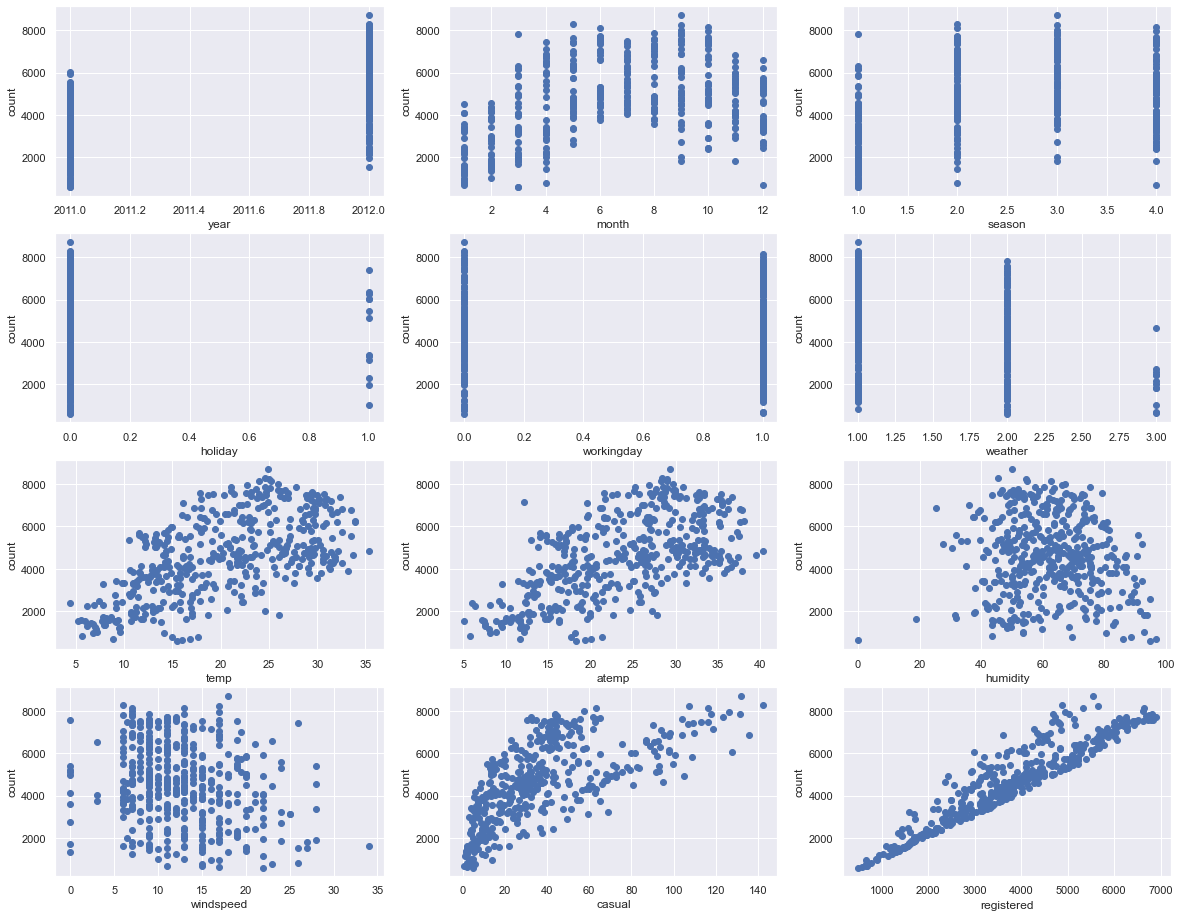

In [167]:
# Постройте графики зависимостей целевого признака count
# от каждого из нецелевых
# Должно получиться 12 графиков, используйте subplot
year_list = df['year'].tolist()
month_list = df['month'].tolist()
season_list = df['season'].tolist()
holiday_list = df['holiday'].tolist()
workingday_list = df['workingday'].tolist()
weather_list = df['weather'].tolist()
temp_list = df['temp'].tolist()
atemp_list = df['atemp'].tolist()
humidity_list = df['humidity'].tolist()
windspeed_list = df['windspeed'].tolist()
casual_list = df['casual'].tolist()
registered_list = df['registered'].tolist()
count_list = df['count'].tolist()


fig, ax = plt.subplots(4, 3, figsize=(20,16))

ax[0,0].scatter(year_list, count_list)
ax[0,1].scatter(month_list, count_list)
ax[0,2].scatter(season_list, count_list)
ax[1,0].scatter(holiday_list, count_list)
ax[1,1].scatter(workingday_list, count_list)
ax[1,2].scatter(weather_list, count_list)
ax[2,0].scatter(temp_list, count_list)
ax[2,1].scatter(atemp_list, count_list)
ax[2,2].scatter(humidity_list, count_list)
ax[3,0].scatter(windspeed_list, count_list)
ax[3,1].scatter(casual_list, count_list)
ax[3,2].scatter(registered_list, count_list)

ax[0,0].set_xlabel('year')
ax[0,1].set_xlabel('month')
ax[0,2].set_xlabel('season')
ax[1,0].set_xlabel('holiday')
ax[1,1].set_xlabel('workingday')
ax[1,2].set_xlabel('weather')
ax[2,0].set_xlabel('temp')
ax[2,1].set_xlabel('atemp')
ax[2,2].set_xlabel('humidity')
ax[3,0].set_xlabel('windspeed')
ax[3,1].set_xlabel('casual')
ax[3,2].set_xlabel('registered')

ax[0,0].set_ylabel('count')
ax[0,1].set_ylabel('count')
ax[0,2].set_ylabel('count')
ax[1,0].set_ylabel('count')
ax[1,1].set_ylabel('count')
ax[1,2].set_ylabel('count')
ax[2,0].set_ylabel('count')
ax[2,1].set_ylabel('count')
ax[2,2].set_ylabel('count')
ax[3,0].set_ylabel('count')
ax[3,1].set_ylabel('count')
ax[3,2].set_ylabel('count')

plt.show()

**1. Ответьте на вопросы:**

Каков характер зависимости числа прокатов от месяца?

Укажите один или два признака, от которых число прокатов скорее всего зависит линейно


In [168]:
#ответ 1: больше всего прокатов в конце лета, меньше всего - в начале и конце года.
#ответ 2: temp, atemp

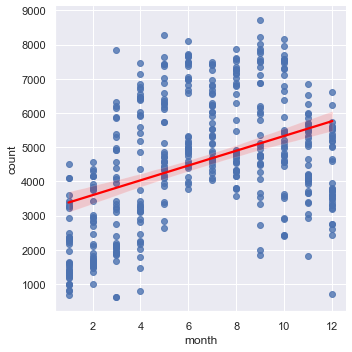

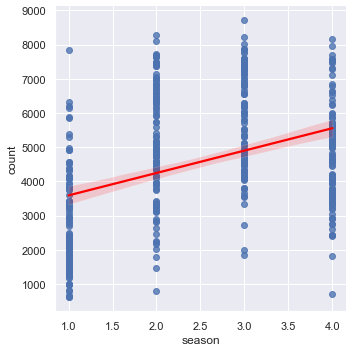

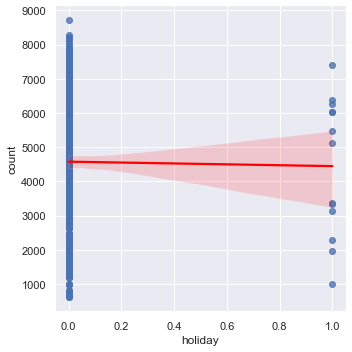

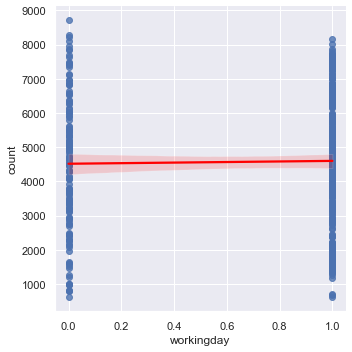

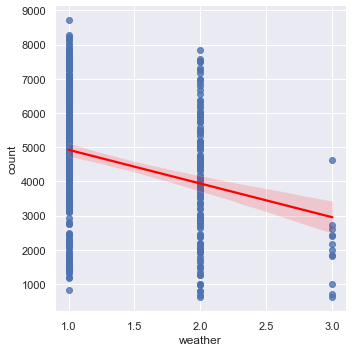

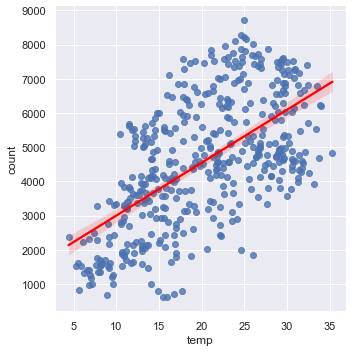

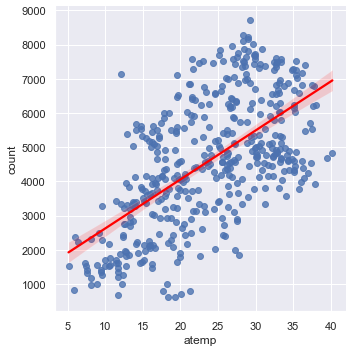

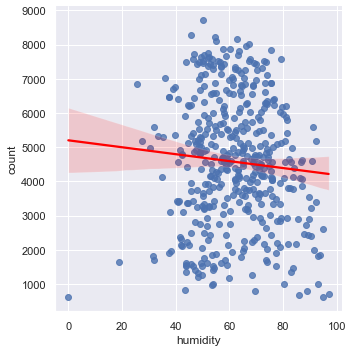

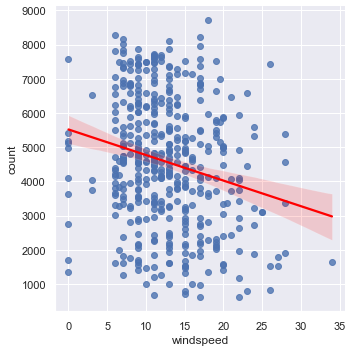

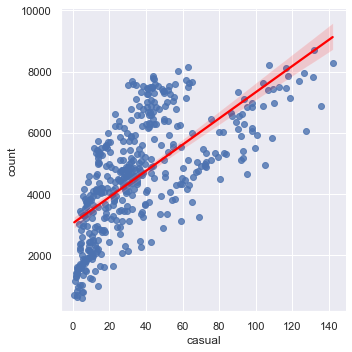

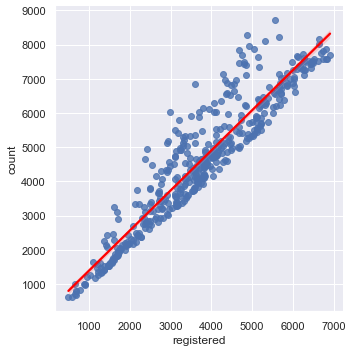

In [169]:
# Проверьте ответы на предыдущие вопросы с помощью lmplot
sns.lmplot(data=df, x='month', y='count', line_kws={'color': 'red'})
sns.lmplot(data=df, x='season', y='count', line_kws={'color': 'red'})
sns.lmplot(data=df, x='holiday', y='count', line_kws={'color': 'red'})
sns.lmplot(data=df, x='workingday', y='count', line_kws={'color': 'red'})
sns.lmplot(data=df, x='weather', y='count', line_kws={'color': 'red'})
sns.lmplot(data=df, x='temp', y='count', line_kws={'color': 'red'})
sns.lmplot(data=df, x='atemp', y='count', line_kws={'color': 'red'})
sns.lmplot(data=df, x='humidity', y='count', line_kws={'color': 'red'})
sns.lmplot(data=df, x='windspeed', y='count', line_kws={'color': 'red'})
sns.lmplot(data=df, x='casual', y='count', line_kws={'color': 'red'})
sns.lmplot(data=df, x='registered', y='count', line_kws={'color': 'red'})

**2. Корреляционная матрица**

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная величина корреляции, тем взаимосвязь больше.


                year     month    season   holiday  workingday   weather  \
year        1.000000  0.000000  0.000000  0.013177   -0.004709 -0.066111   
month       0.000000  1.000000  0.971625  0.001909   -0.006139  0.055060   
season      0.000000  0.971625  1.000000  0.029465   -0.010530  0.044349   
holiday     0.013177  0.001909  0.029465  1.000000   -0.250880 -0.015354   
workingday -0.004709 -0.006139 -0.010530 -0.250880    1.000000  0.022298   
weather    -0.066111  0.055060  0.044349 -0.015354    0.022298  1.000000   
temp        0.069133  0.279117  0.279693  0.000664    0.028408 -0.090434   
atemp       0.066493  0.286749  0.286781 -0.005230    0.022898 -0.085938   
humidity   -0.107369  0.275369  0.257299  0.001652   -0.014252  0.537108   
windspeed  -0.035704 -0.217285 -0.216903  0.000427    0.028059 -0.025305   
casual      0.252439  0.164327  0.170810  0.075275   -0.548755 -0.234903   
registered  0.647855  0.423825  0.410163 -0.049767    0.282694 -0.241220   
count       

<AxesSubplot:>

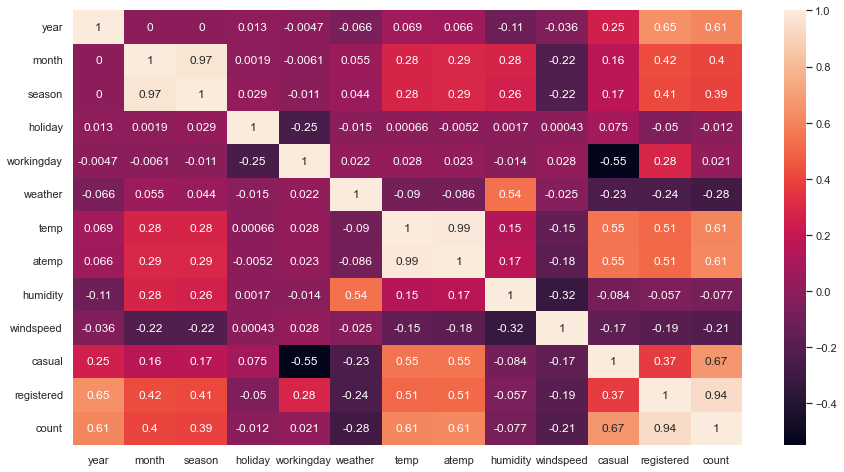

In [170]:
#Постройте heatmap корреляционной матрицы. 
#Матрица формируется средствами pandas, 
#со стандартным значением параметров.
numeric_col = ['year', 'month', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

corr_matrix = df.corr()
print(corr_matrix)

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_matrix, annot=True)

`Ответьте на вопросы:` с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). 

А с какими больше всего?

In [171]:
#меньше: holiday, workingday, humidity

In [172]:
#больше: year, temp, atemp

**3. Barplot**

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

<AxesSubplot:xlabel='year'>

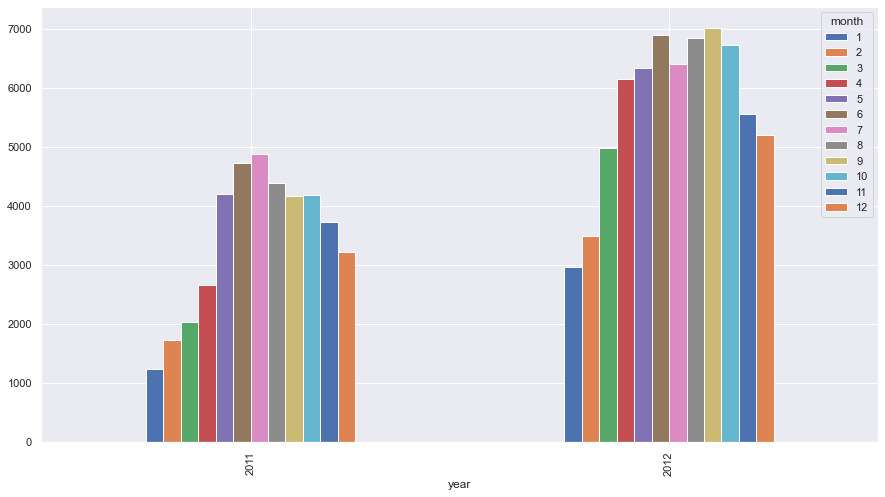

In [173]:
# напишите код для посторения bar графика

year = df.pivot_table('count', columns='month', index='year')
year.plot.bar()


`Ответьте на вопрос:` почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

**4. Countplot**

Постройте countplot диаграммы для признаков `holiday`, `workingday`, `weather`

C:\Users\konva\AppData\Local\Temp/ipykernel_4620/382608738.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1440x1152 with 0 Axes>

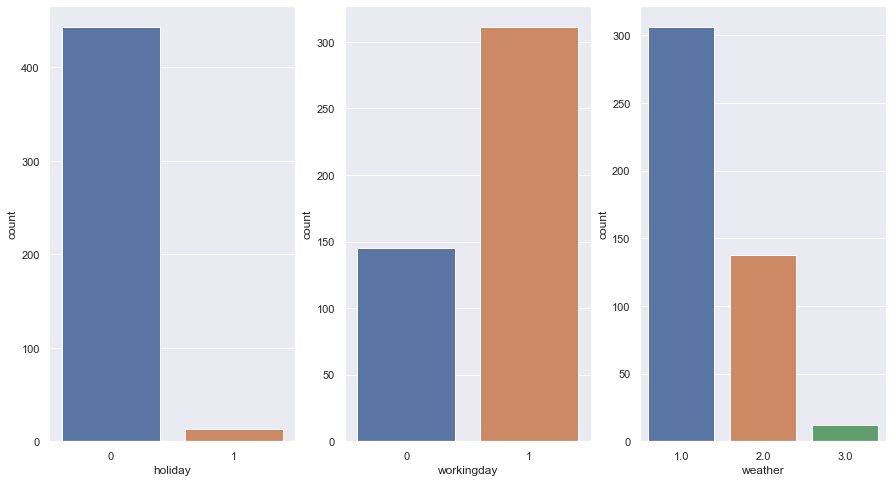

In [174]:
# напишите код для посторения Countplot графиков

plt.figure(figsize=(20, 16))
fig, ax = plt.subplots(1,3)
sns.countplot(x="holiday", data=df, ax=ax[0])
sns.countplot(x="workingday", data=df, ax=ax[1])
sns.countplot(x="weather", data=df, ax=ax[2])
fig.show()

`Ответьте на вопрос:` какие можно сделать выводы их этих графиков.

In [175]:
# ответ

**5. Распределение**

Постройте распределение целевого признака.

C:\Users\konva\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

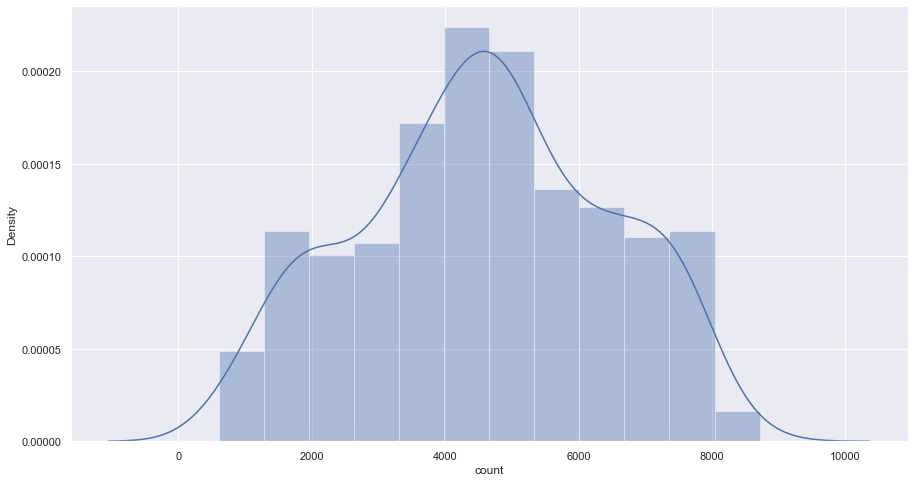

In [176]:
# код
sns.distplot(df['count'])